# Live Demo from CS224n for Tensorflow
Thie demo video can found from https://www.youtube.com/watch?v=PicxU81owCs&index=7&list=PL3FW7Lu3i5Jsnh1rnUwq_TcylNr7EkRe6


In [2]:
# init and imports
import numpy as np
import tensorflow as tf
import matplotlib
matplotlib.use('TKAgg')
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
# generate linear data
def generate_dataset():
    # y = 2x + e
    # where 'e' is sampled from a normal distribution
    x_batch = np.linspace(-1, 1, 101)
    y_batch = 2 * x_batch + np.random.randn(*x_batch.shape) * 0.3
    return x_batch, y_batch


In [14]:
def run():
    x_batch, y_batch = generate_dataset()
    
    # demo code here
    x, y, y_pred, loss = linear_regression()
    optimizer = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    init = tf.global_variables_initializer()
    with tf.Session() as session:
        session.run(init)
        
        feed_dict = {x: x_batch, y:y_batch}
        
        for _ in range(30):
            loss_val, _ = session.run([loss, optimizer], feed_dict)
            print('loss:', loss_val.mean())
            
        y_pred_batch = session.run(y_pred, {x: x_batch})
    # end of demo code
    plt.figure(1)
    plt.scatter(x_batch, y_batch)
    plt.plot(x_batch, y_pred_batch)
    plt.savefig('plot.png')
    
def linear_regression():
    x = tf.placeholder(tf.float32, shape=(None,), name='x')
    y = tf.placeholder(tf.float32, shape=(None,), name='y')
    
    with tf.variable_scope('lreg') as scope:
        w = tf.Variable(np.random.normal(), name='W')
        y_pred = tf.multiply(w,x)
        loss = tf.reduce_mean(tf.square(y_pred - y))
    return x, y, y_pred, loss

loss: 3.10169
loss: 2.70466
loss: 2.35979
loss: 2.06023
loss: 1.80003
loss: 1.574
loss: 1.37768
loss: 1.20714
loss: 1.05901
loss: 0.930343
loss: 0.818578
loss: 0.721496
loss: 0.637168
loss: 0.563919
loss: 0.500293
loss: 0.445025
loss: 0.397019
loss: 0.35532
loss: 0.319099
loss: 0.287636
loss: 0.260307
loss: 0.236568
loss: 0.215948
loss: 0.198037
loss: 0.182479
loss: 0.168965
loss: 0.157226
loss: 0.14703
loss: 0.138173
loss: 0.13048


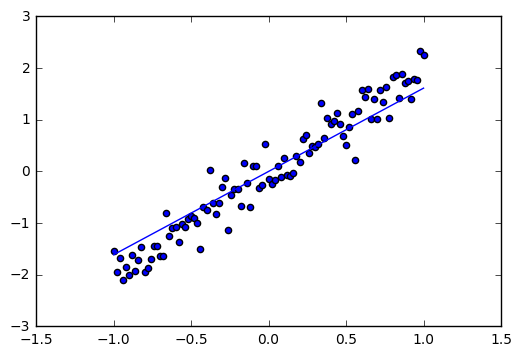

In [15]:
run()